In [94]:
import pandas as pd
import pycountry
import wbdata
import datetime
import statsmodels.formula.api as smf
import numpy as np
import pylab
import matplotlib
import matplotlib.pyplot as plt




In [95]:
spending_RD = pd.read_csv('Production.csv')

In [96]:
spending_RD = spending_RD.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)

In [97]:
spending_RD

,LOCATION,TIME,Value
0,AUS,2000,10669.107740
1,AUS,2002,12757.717020
2,AUS,2004,14379.681910
3,AUS,2006,17769.638820
4,AUS,2008,21039.218390
...,...,...,...
736,LTU,2014,846.173820
737,LTU,2015,874.214684
738,LTU,2016,723.317538
739,LTU,2017,802.447313


In [98]:
spending_RD.rename(columns ={'LOCATION': 'Code', 'Value': 'USD/Capita', 'TIME': 'Time'}, inplace = True) 

In [99]:
spending_RD

,Code,Time,USD/Capita
0,AUS,2000,10669.107740
1,AUS,2002,12757.717020
2,AUS,2004,14379.681910
3,AUS,2006,17769.638820
4,AUS,2008,21039.218390
...,...,...,...
736,LTU,2014,846.173820
737,LTU,2015,874.214684
738,LTU,2016,723.317538
739,LTU,2017,802.447313


In [100]:
#health_exp_2015 = filter_dict_by_year(health_exp_1, 2015)
spending_RD_2018 = spending_RD[spending_RD['Time']==2018]

len(spending_RD_2018)

34

In [101]:
spending_RD_2018  # <-------------- this will be our independent variable

,Code,Time,USD/Capita
28,AUT,2018,14664.275760
48,BEL,2018,15123.320400
67,CAN,2018,26497.108640
87,CZE,2018,7540.680191
105,DNK,2018,9121.792978
124,FIN,2018,6881.788077
143,FRA,2018,62912.669840
160,GRC,2018,3539.392359
179,HUN,2018,4509.981334
195,ISL,2018,382.794398


In [102]:
def get_codes_list(df_data):
    """Create a list of countries codes from column Code in df_data
    change code for OECD members from OAVG to OED
    :param df_data: data frame
    :returns codes_list: list"""
    codes_list = df_data['Code'].tolist()
    #codes_list.remove('OAVG')
    codes_list.append('OED')
    return codes_list

#get list of countries, who took PISA test
countries_codes = get_codes_list(spending_RD_2018)

In [103]:
def create_name_code_dict():
    """Use pycountry library to create a map for converting from country name to country code
    :returns name_code_dict: dictionary"""
    name_code_dict = {country.name: country.alpha_3 for country in pycountry.countries}
    dict_adjust = {'Czech Republic': 'CZE', 'Hong Kong SAR, China': 'HKG', 'Korea, Rep.': 'KOR',
                      'Macao SAR, China': 'MAC', 'OECD members': 'OED', 'Slovak Republic': 'SVK',
                  'China, Hong Kong Special Administrative Region': 'HKG', 'China, Macao Special Administrative Region': 'MAC',
                  'Republic of Korea': 'KOR', 'United Kingdom of Great Britain and Northern Ireland': 'GBR',
                  'United States of America': 'USA', 'OECD members': 'OAVG'}
    name_code_dict.update(dict_adjust)
    return name_code_dict

def reverse_dict(dictionary):
    """Reverse other map for converting from country code to country name
    :param dictionary: dictionary
    :returns reversed_dict: dictionary"""
    reversed_dict = dict(zip(dictionary.values(), dictionary.keys()))
    return reversed_dict

def add_country_name(df_data, code_name_dict):
    """Take df_data, add a column with country name and fill it using code_name_dict
    :param df_data: data frame
    :param code_name_dict: dictionary"""
    mapper = lambda x: code_name_dict[x]
    df_data.insert(loc=0, column='Country', value=df_data.loc[:, 'Code'].copy())
    df_data['Country'] = df_data['Country'].apply(mapper)

#add column with country name
name_code_dict = create_name_code_dict()
code_name_dict = reverse_dict(name_code_dict)
add_country_name(spending_RD_2018, code_name_dict)
code_name_dict


C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'ABW': 'Aruba',
 'AFG': 'Afghanistan',
 'AGO': 'Angola',
 'AIA': 'Anguilla',
 'ALA': 'Åland Islands',
 'ALB': 'Albania',
 'AND': 'Andorra',
 'ARE': 'United Arab Emirates',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ASM': 'American Samoa',
 'ATA': 'Antarctica',
 'ATF': 'French Southern Territories',
 'ATG': 'Antigua and Barbuda',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BDI': 'Burundi',
 'BEL': 'Belgium',
 'BEN': 'Benin',
 'BES': 'Bonaire, Sint Eustatius and Saba',
 'BFA': 'Burkina Faso',
 'BGD': 'Bangladesh',
 'BGR': 'Bulgaria',
 'BHR': 'Bahrain',
 'BHS': 'Bahamas',
 'BIH': 'Bosnia and Herzegovina',
 'BLM': 'Saint Barthélemy',
 'BLR': 'Belarus',
 'BLZ': 'Belize',
 'BMU': 'Bermuda',
 'BOL': 'Bolivia, Plurinational State of',
 'BRA': 'Brazil',
 'BRB': 'Barbados',
 'BRN': 'Brunei Darussalam',
 'BTN': 'Bhutan',
 'BVT': 'Bouvet Island',
 'BWA': 'Botswana',
 'CAF': 'Central African Republic',
 'CAN': 'Canada',
 'CCK': 'Cocos (Keeling) Islands',
 'CHE': 'Switzerland',
 

In [104]:
spending_RD_2018

,Country,Code,Time,USD/Capita
28,Austria,AUT,2018,14664.275760
48,Belgium,BEL,2018,15123.320400
67,Canada,CAN,2018,26497.108640
87,Czech Republic,CZE,2018,7540.680191
105,Denmark,DNK,2018,9121.792978
124,Finland,FIN,2018,6881.788077
143,France,FRA,2018,62912.669840
160,Greece,GRC,2018,3539.392359
179,Hungary,HUN,2018,4509.981334
195,Iceland,ISL,2018,382.794398


In [105]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
gdp_ppp = load_from_wbdata(countries_codes, {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2015, 2015)


In [106]:
gdp_ppp

,gdp_ppp
country,
Austria,44197.540203
Belgium,42045.383622
Canada,43124.211103
China,13534.846237
Czech Republic,30605.420521
Denmark,45787.983950
Spain,32293.759662
Estonia,27409.750123
Finland,39391.415799


In [107]:

#reset index "country'
gdp_ppp.reset_index(level=['country'], inplace=True)


In [108]:
def add_country_code(df_data, name_code_dict):
    """Take df_data, add a column with country code and fill it using name_code_dict
    :param df_data: data frame
    :param name_code_dict: dictionary"""
    mapper = lambda x: name_code_dict[x]
    df_data.insert(loc=1, column='Code', value=df_data.loc[:, 'country'].copy())
    df_data['Code'] = df_data['Code'].apply(mapper)

#add column with country code
add_country_code(gdp_ppp, name_code_dict)

gdp_ppp

,country,Code,gdp_ppp
0,Austria,AUT,44197.540203
1,Belgium,BEL,42045.383622
2,Canada,CAN,43124.211103
3,China,CHN,13534.846237
4,Czech Republic,CZE,30605.420521
5,Denmark,DNK,45787.983950
6,Spain,ESP,32293.759662
7,Estonia,EST,27409.750123
8,Finland,FIN,39391.415799
9,France,FRA,37835.807077


<font size=4> <center> <br><br><br> <u> Regression Analysis   <br><br><br>

In [109]:
def merge_df_onCode(df_data1, df_data2):
    """Merge two data frames on Code column, drop double country column
    :param df_data1: data frame
    :param df_data2: data frame
    :returns df_joined: data frame"""
    df_joined = pd.merge(df_data1, df_data2, on='Code')
 #   df_joined.drop(['Country_y'], axis=1, inplace=True)
    return df_joined

#merge data 
combined_RD_gdp_ppp = merge_df_onCode(spending_RD_2018, gdp_ppp)
combined_RD_gdp_ppp

,Country,Code,Time,USD/Capita,country,gdp_ppp
0,Austria,AUT,2018,14664.275760,Austria,44197.540203
1,Belgium,BEL,2018,15123.320400,Belgium,42045.383622
2,Canada,CAN,2018,26497.108640,Canada,43124.211103
3,Czech Republic,CZE,2018,7540.680191,Czech Republic,30605.420521
4,Denmark,DNK,2018,9121.792978,Denmark,45787.983950
5,Finland,FIN,2018,6881.788077,Finland,39391.415799
6,France,FRA,2018,62912.669840,France,37835.807077
7,Greece,GRC,2018,3539.392359,Greece,24134.684393
8,Hungary,HUN,2018,4509.981334,Hungary,25212.053105
9,Iceland,ISL,2018,382.794398,Iceland,44222.826860


In [110]:
combined_RD_gdp_ppp.drop(['country'], axis=1)

,Country,Code,Time,USD/Capita,gdp_ppp
0,Austria,AUT,2018,14664.275760,44197.540203
1,Belgium,BEL,2018,15123.320400,42045.383622
2,Canada,CAN,2018,26497.108640,43124.211103
3,Czech Republic,CZE,2018,7540.680191,30605.420521
4,Denmark,DNK,2018,9121.792978,45787.983950
5,Finland,FIN,2018,6881.788077,39391.415799
6,France,FRA,2018,62912.669840,37835.807077
7,Greece,GRC,2018,3539.392359,24134.684393
8,Hungary,HUN,2018,4509.981334,25212.053105
9,Iceland,ISL,2018,382.794398,44222.826860


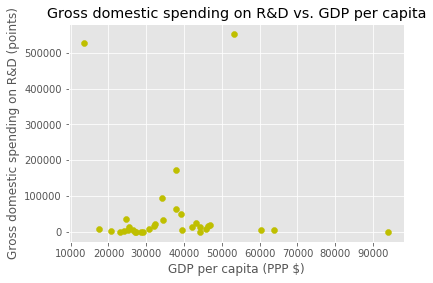

In [111]:
def show_scatterplot(df_data, variables, color, title, xlabel, ylabel):
    """Take df_data and plot for chosen columns in variables list
    :param df_data: data frame
    :param variables: list of strings
    :param color: string"""
    plt.scatter(x=df_data[variables[0]], y=df_data[variables[1]], color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
matplotlib.style.use('ggplot')
plot_RD_gdp_ppp = show_scatterplot(combined_RD_gdp_ppp, ['gdp_ppp', 'USD/Capita'], 'y',
                                    'Gross domestic spending on R&D vs. GDP per capita', 'GDP per capita (PPP $)',
                                    'Gross domestic spending on R&D (points)')

<font size = 3> <br> <br> <center> <i> Pretty much linear except a few outliers. Taking log to reduce the skewness <br>

In [112]:
combined_RD_gdp_ppp

,Country,Code,Time,USD/Capita,country,gdp_ppp
0,Austria,AUT,2018,14664.275760,Austria,44197.540203
1,Belgium,BEL,2018,15123.320400,Belgium,42045.383622
2,Canada,CAN,2018,26497.108640,Canada,43124.211103
3,Czech Republic,CZE,2018,7540.680191,Czech Republic,30605.420521
4,Denmark,DNK,2018,9121.792978,Denmark,45787.983950
5,Finland,FIN,2018,6881.788077,Finland,39391.415799
6,France,FRA,2018,62912.669840,France,37835.807077
7,Greece,GRC,2018,3539.392359,Greece,24134.684393
8,Hungary,HUN,2018,4509.981334,Hungary,25212.053105
9,Iceland,ISL,2018,382.794398,Iceland,44222.826860


In [113]:
RD_gdp_ppp_log = combined_RD_gdp_ppp

In [114]:
RD_gdp_ppp_log['log_value'] = np.log(combined_RD_gdp_ppp['gdp_ppp'])

In [115]:
RD_gdp_ppp_log

,Country,Code,Time,USD/Capita,country,gdp_ppp,log_value
0,Austria,AUT,2018,14664.275760,Austria,44197.540203,10.696424
1,Belgium,BEL,2018,15123.320400,Belgium,42045.383622,10.646505
2,Canada,CAN,2018,26497.108640,Canada,43124.211103,10.671840
3,Czech Republic,CZE,2018,7540.680191,Czech Republic,30605.420521,10.328932
4,Denmark,DNK,2018,9121.792978,Denmark,45787.983950,10.731777
5,Finland,FIN,2018,6881.788077,Finland,39391.415799,10.581303
6,France,FRA,2018,62912.669840,France,37835.807077,10.541011
7,Greece,GRC,2018,3539.392359,Greece,24134.684393,10.091405
8,Hungary,HUN,2018,4509.981334,Hungary,25212.053105,10.135077
9,Iceland,ISL,2018,382.794398,Iceland,44222.826860,10.696996


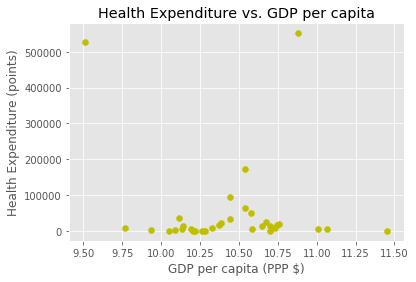

In [116]:
plot_RD_gdp_ppp = show_scatterplot(combined_RD_gdp_ppp, ['log_value', 'USD/Capita'], 'y',
                                    'Health Expenditure vs. GDP per capita', 'GDP per capita (PPP $)',
                                    'Health Expenditure (points)')

In [117]:
RD_gdp_ppp_log = RD_gdp_ppp_log.rename(columns={"log_value": "gdp_ppp_log" ,"USD/Capita" : "spending_on_RD"})
RD_gdp_ppp_log

,Country,Code,Time,spending_on_RD,country,gdp_ppp,gdp_ppp_log
0,Austria,AUT,2018,14664.275760,Austria,44197.540203,10.696424
1,Belgium,BEL,2018,15123.320400,Belgium,42045.383622,10.646505
2,Canada,CAN,2018,26497.108640,Canada,43124.211103,10.671840
3,Czech Republic,CZE,2018,7540.680191,Czech Republic,30605.420521,10.328932
4,Denmark,DNK,2018,9121.792978,Denmark,45787.983950,10.731777
5,Finland,FIN,2018,6881.788077,Finland,39391.415799,10.581303
6,France,FRA,2018,62912.669840,France,37835.807077,10.541011
7,Greece,GRC,2018,3539.392359,Greece,24134.684393,10.091405
8,Hungary,HUN,2018,4509.981334,Hungary,25212.053105,10.135077
9,Iceland,ISL,2018,382.794398,Iceland,44222.826860,10.696996


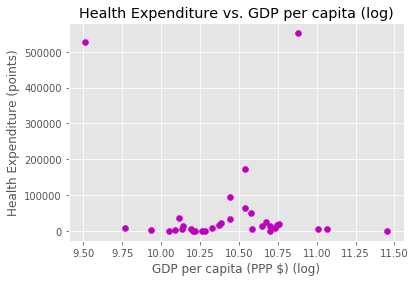

In [118]:

#take log from GDP values
#health_gdp_ppp_log = take_log(combined_health_gdp_ppp, ['gdp_ppp'])

#plot with GDP log
plot_RD_gdp_ppp_log = show_scatterplot(RD_gdp_ppp_log, ['gdp_ppp_log', 'spending_on_RD'], 'm', 
                                         'Health Expenditure vs. GDP per capita (log)', 'GDP per capita (PPP $) (log)',
                                    'Health Expenditure (points)')

In [119]:
#perform OLS 
model_health_gdp_ppp_log = smf.ols(formula=' gdp_ppp_log ~ spending_on_RD ', data=RD_gdp_ppp_log).fit()
model_health_gdp_ppp_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_ppp_log   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.5002
Date:                Sun, 12 Apr 2020   Prob (F-statistic):              0.485
Time:                        14:06:18   Log-Likelihood:                -14.987
No. Observations:                  33   AIC:                             33.97
Df Residuals:                      31   BIC:                             36.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.4580      0.074    141.326      0.000      10.307      10.609
spending_on_RD -3.782e-07   5.35e-07     -0.707      0.485   -1.47e-06    7.12e-07
==============================================================================
Omnibus:                        1.039   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.591
Skew:                           0.328   Prob(JB):                        0.744
Kurtosis:                       3.017   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""